<a href="https://colab.research.google.com/github/Isha-Ismail/Network-Intrusion-Implementation/blob/main/Deep%20Learning/CICD%202017/DL_Binary_on__CICD_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [6]:
!pip install pytorch_tabnet
!pip install pytorch_tabular
!pip install catboost
!pip install deeptables

     |████████████████████████████████| 2.0 MB 11.5 MB/s 
     |████████████████████████████████| 80 kB 3.9 MB/s 
     |████████████████████████████████| 9.5 MB 46.7 MB/s 
     |████████████████████████████████| 809 kB 65.9 MB/s 
     |████████████████████████████████| 78 kB 4.3 MB/s 
     |████████████████████████████████| 409 kB 45.0 MB/s 
     |████████████████████████████████| 596 kB 27.0 MB/s 
     |████████████████████████████████| 829 kB 62.6 MB/s 
     |████████████████████████████████| 136 kB 68.6 MB/s 
     |████████████████████████████████| 636 kB 63.3 MB/s 
     |████████████████████████████████| 1.1 MB 44.4 MB/s 
     |████████████████████████████████| 117 kB 69.7 MB/s 
     |████████████████████████████████| 144 kB 75.1 MB/s 
     |████████████████████████████████| 94 kB 1.8 MB/s 
     |████████████████████████████████| 271 kB 66.1 MB/s 
  Created wheel for pytorch-tabular: filename=pytorch_tabular-0.7.0-py2.py3-none-any.whl size=83790 sha256=866030d6cff01cf50fcf04993b9f4

     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 832 kB 13.6 MB/s 
     |████████████████████████████████| 2.9 MB 72.5 MB/s 
     |████████████████████████████████| 216 kB 68.2 MB/s 
     |████████████████████████████████| 1.7 MB 44.1 MB/s 
     |████████████████████████████████| 353 kB 64.0 MB/s 
     |████████████████████████████████| 149 kB 65.5 MB/s 
     |████████████████████████████████| 212 kB 64.8 MB/s 
     |████████████████████████████████| 837 kB 77.9 MB/s 
     |████████████████████████████████| 1.1 MB 75.1 MB/s 
     |████████████████████████████████| 11.3 MB 66.2 MB/s 
     |████████████████████████████████| 172 kB 65.5 MB/s 
     |████████████████████████████████| 207 kB 81.0 MB/s 
     |████████████████████████████████| 280 kB 80.8 MB/s 
     |████████████████████████████████| 133 kB 69.0 MB/s 
     |████████████████████████████████| 62 kB 749 kB/s 
     |████████████████████████████████| 4.0 MB 52.0 MB/s 
     |█████████

In [7]:
import warnings
warnings.filterwarnings('ignore')

from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import precision_recall_fscore_support
# build the lightgbm model
import lightgbm as lgb

from catboost import CatBoostClassifier, Pool
from hyperopt import fmin, hp, tpe
import pandas as pd
from sklearn.model_selection import StratifiedKFold

import numpy as np
from deeptables.models import deeptable, deepnets
from deeptables.datasets import dsutils
from sklearn.model_selection import train_test_split

In [1]:
!pip  install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=8dfe12f26cf7cd55c78ff8e153a32eb856e92cf6572f44d2b841c464fd0ea106
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
import wget
data = wget.download('https://dl.dropboxusercontent.com/s/iv5lxk1mayst93a/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv?dl=0')

# read csv

In [8]:
bin_data  = pd.read_csv(data)
# df.drop(df.columns[0],axis=1,inplace=True)
bin_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


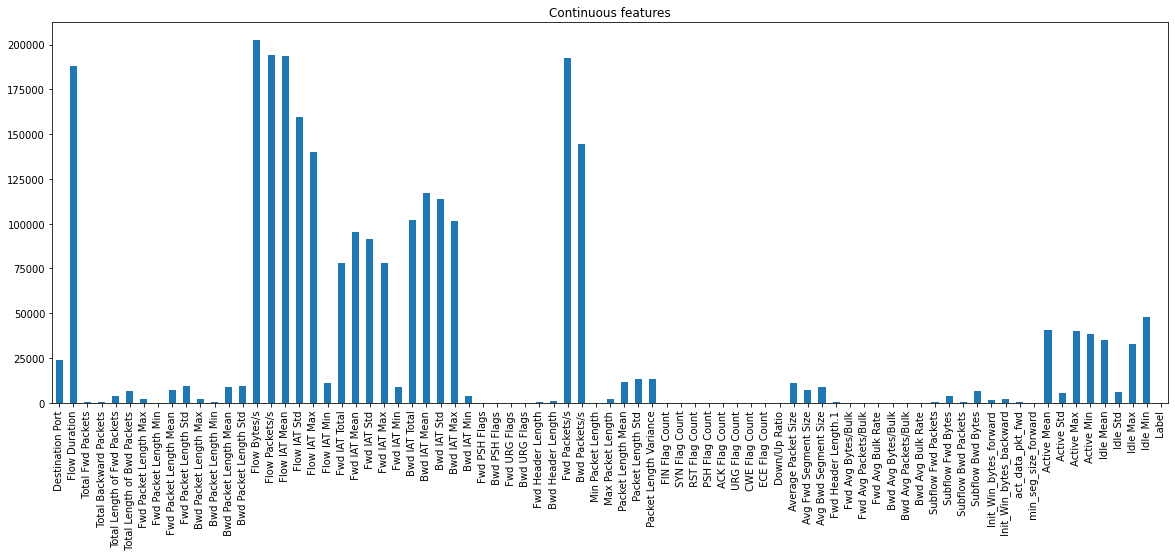

In [ ]:
import matplotlib.pyplot as plt
plt.title('Continuous features')
bin_data.nunique().plot(kind='bar', figsize=(20,7))

In [ ]:
bin_data = bin_data.drop([' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Bwd IAT Mean', ' Bwd IAT Std', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Variance', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Active Mean',
       ' Active Std', 'Idle Mean', ' Idle Std'], axis =1)

In [ ]:
bin_data = bin_data.rename(columns = {" Label":"label"})

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
bin_data['label'] = label_encoder.fit_transform(bin_data['label'])

In [ ]:
X = bin_data.iloc[:,:-1]
y = bin_data.iloc[:,54:55]

In [ ]:
y = np.array(y)
y = y.flatten()

In [ ]:
np.unique(y)

array([0, 1])

Spliting for TabNEt

In [ ]:
# split data into train, test and validation set with splitted feature and class
def get_train_test_val_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.22, random_state=2)
    return X_train, X_test, X_val, y_train, y_test, y_val
# get train, test and validation set
X_train, X_test, X_val, y_train, y_test, y_val = get_train_test_val_split()


Build CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.utils import to_categorical

In [ ]:
# deep learning model initialization
model = tf.keras.models.Sequential()  
model.add(Dense(1000,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

New_X_train = model.predict(X_train)
New_X_test = model.predict(X_test)
New_X_val = model.predict(X_val)

Evaluation Function

In [ ]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    import seaborn as sns
    from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
    from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
#     print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

# 01 TabNet

TabNet provides a high-performance and interpretable tabular data deep learning architecture. It uses a method called sequential attention mechanism to enabling which feature to choose to cause high interpretability and efficient training.

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
# get train, test and validation set
# X_train, X_test, X_val, y_train, y_test, y_val = get_train_test_val_split()

# initialize model
clf = TabNetClassifier()  #TabNetRegressor()
# fit model
clf.fit(
  New_X_train, y_train,
  eval_set=[(New_X_val, y_val)]
)

Device used : cpu
epoch 0  | loss: 0.39721 | val_0_auc: 0.9469  |  0:00:08s
epoch 1  | loss: 0.26141 | val_0_auc: 0.94638 |  0:00:15s
epoch 2  | loss: 0.24963 | val_0_auc: 0.94848 |  0:00:22s
epoch 3  | loss: 0.23261 | val_0_auc: 0.96546 |  0:00:29s
epoch 4  | loss: 0.21964 | val_0_auc: 0.95413 |  0:00:39s
epoch 5  | loss: 0.20703 | val_0_auc: 0.93324 |  0:00:52s
epoch 6  | loss: 0.20084 | val_0_auc: 0.93406 |  0:01:03s
epoch 7  | loss: 0.19472 | val_0_auc: 0.95044 |  0:01:10s
epoch 8  | loss: 0.20023 | val_0_auc: 0.97695 |  0:01:17s
epoch 9  | loss: 0.18539 | val_0_auc: 0.88393 |  0:01:24s
epoch 10 | loss: 0.18844 | val_0_auc: 0.93131 |  0:01:32s
epoch 11 | loss: 0.18395 | val_0_auc: 0.91736 |  0:01:39s
epoch 12 | loss: 0.17269 | val_0_auc: 0.88627 |  0:01:46s
epoch 13 | loss: 0.17707 | val_0_auc: 0.92668 |  0:01:53s
epoch 14 | loss: 0.16421 | val_0_auc: 0.9255  |  0:02:00s
epoch 15 | loss: 0.15196 | val_0_auc: 0.94931 |  0:02:07s
epoch 16 | loss: 0.15755 | val_0_auc: 0.8992  |  0:02:

## make predictions

========== TabNet Model ==========

Accuracy on validation set: 0.9218

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     10055
           1       0.92      0.95      0.93     12520

    accuracy                           0.92     22575
   macro avg       0.92      0.92      0.92     22575
weighted avg       0.92      0.92      0.92     22575



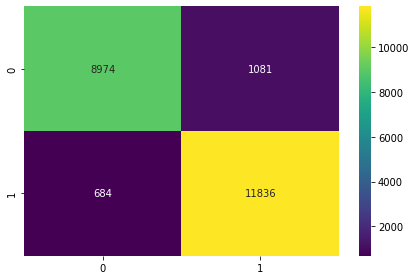

[0.9218161683277962, 0.922744860366839, 0.9189293550011677, 0.920539031002421]

In [ ]:
# make prediction using trained model
y_pred = clf.predict(New_X_test)
# calculate accuracy and other evaluation measures
modelEvaluation(y_test, y_pred, 'TabNet Model')

# 02 Light Gradient Boosted Machine

In [ ]:
# get train, test and validation set
# X_train, X_test, y_train, y_test = get_train_test_split()
# initialize model
clf = lgb.LGBMClassifier()
# fit model
clf.fit(New_X_train, y_train)

LGBMClassifier()

## make predictions

========== Light Gradient Boosted Machine ==========

Accuracy on validation set: 0.9833

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9479
           1       0.99      0.98      0.99     13096

    accuracy                           0.98     22575
   macro avg       0.98      0.98      0.98     22575
weighted avg       0.98      0.98      0.98     22575



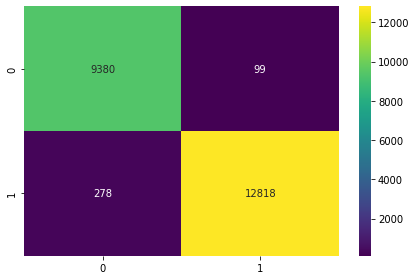

[0.9833001107419712,
 0.9817756271210716,
 0.9841640022444882,
 0.9829035944482689]

In [ ]:
# make prediction using trained model
y_pred = clf.predict(New_X_test)
# calculate accuracy and other evaluation measures
modelEvaluation(y_test, y_pred, 'Light Gradient Boosted Machine')

# 03 CatBoost
“CatBoost” name comes from two words “Category” and “Boosting”. As discussed, the library works well with multiple Categories of data, such as audio, text, image including historical data. “Boost” comes from gradient boosting machine learning algorithm as this library is based on gradient boosting library.

In [ ]:
# get train, test and validation set
# X_train, X_test, y_train, y_test = get_train_test_split()

# preparing data for model training
train_pool = Pool(New_X_train, y_train)
test_pool = Pool(New_X_test, y_test)

In [ ]:
# model hyper paramete settings
search_space = {'iterations': hp.quniform('iterations', 10, 1000, 10),
                'depth': hp.quniform('depth', 2, 12, 1),
                'lr': hp.uniform('lr', 0.01, 1)
               }

# model initialization and training
model = CatBoostClassifier(iterations=100,
                             depth=8,
                             learning_rate=1,
                             loss_function='MultiClass') 
model.fit(train_pool)

0:	learn: 0.2519369	total: 143ms	remaining: 14.2s
1:	learn: 0.1675090	total: 226ms	remaining: 11.1s
2:	learn: 0.1332770	total: 313ms	remaining: 10.1s
3:	learn: 0.1170912	total: 398ms	remaining: 9.55s
4:	learn: 0.1055318	total: 477ms	remaining: 9.06s
5:	learn: 0.0985099	total: 559ms	remaining: 8.75s
6:	learn: 0.0928032	total: 655ms	remaining: 8.7s
7:	learn: 0.0874984	total: 741ms	remaining: 8.52s
8:	learn: 0.0822325	total: 818ms	remaining: 8.27s
9:	learn: 0.0798069	total: 904ms	remaining: 8.14s
10:	learn: 0.0783715	total: 978ms	remaining: 7.91s
11:	learn: 0.0738930	total: 1.05s	remaining: 7.74s
12:	learn: 0.0735389	total: 1.13s	remaining: 7.55s
13:	learn: 0.0688337	total: 1.21s	remaining: 7.45s
14:	learn: 0.0624845	total: 1.3s	remaining: 7.35s
15:	learn: 0.0600969	total: 1.38s	remaining: 7.25s
16:	learn: 0.0587208	total: 1.46s	remaining: 7.11s
17:	learn: 0.0553485	total: 1.53s	remaining: 6.99s
18:	learn: 0.0532254	total: 1.63s	remaining: 6.93s
19:	learn: 0.0506684	total: 1.71s	remaining

========== CatBoost ==========

Accuracy on validation set: 0.9949

Classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      9627
           1       1.00      0.99      1.00     12948

    accuracy                           0.99     22575
   macro avg       0.99      0.99      0.99     22575
weighted avg       0.99      0.99      0.99     22575



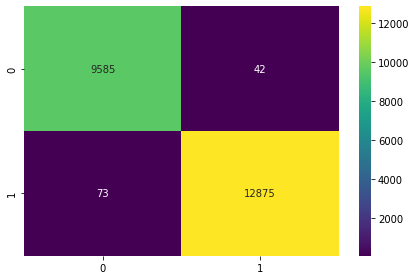

[0.994905869324474, 0.994594985141206, 0.9949996669083987, 0.9947953267050786]

In [ ]:
# make prediction using trained model
predictions = model.predict(test_pool)
# calculate accuracy and other evaluation measures
y_pred = [pred[0] for pred in predictions]
# make_predictions(y_test, y_pred)
modelEvaluation(y_test, y_pred, 'CatBoost')

# 04 Deeptables

In [ ]:
# get train, test and validation set
# X_train, X_test, X_val, y_train, y_test, y_val = get_train_test_val_split()
# initialize model
config = deeptable.ModelConfig(nets=deepnets.DeepFM)
dt = deeptable.DeepTable()
# fit model
model, history = dt.fit(New_X_train, y_train, validation_data=(New_X_val, y_val), epochs=50)

04-26 10:43:17 I deeptables.m.deeptable.py 338 - X.Shape=(158472, 15), y.Shape=(158472,), batch_size=128, config=ModelConfig(name='conf-1', nets=['dnn_nets'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['accuracy'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=0.3, stacking_op='add', output_use_bias=True, apply_class_weight=False, optimizer='auto', loss='auto', dnn_params={'hidden_units': ((128, 0, False), (64, 0, False)), 'activation': 'relu'}, autoint_params={'num_attention': 3, 'num_heads': 1, 'dropout_rate': 0, 'use_residual': True}, fgcnn_params={'fg_filters': (14, 16), 'fg_

04-26 10:43:17 W deeptables.m.__init__.py 1395 - Column index of X has been converted: Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14'],
      dtype='object')


04-26 10:43:17 I deeptables.m.preprocessor.py 261 - Preparing features...
04-26 10:43:18 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.07300734519958496s
04-26 10:43:18 I deeptables.m.preprocessor.py 341 - Data imputation...
04-26 10:43:18 I deeptables.m.preprocessor.py 383 - Imputation taken 0.07718205451965332s
04-26 10:43:18 I deeptables.m.preprocessor.py 388 - Categorical encoding...
04-26 10:43:18 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.0027887821197509766s
04-26 10:43:18 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.23541927337646484s
04-26 10:43:18 I deeptables.m.preprocessor.py 242 - Transform [X]...


04-26 10:43:18 W deeptables.m.__init__.py 1395 - Column index of X has been converted: Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14'],
      dtype='object')


04-26 10:43:18 I deeptables.m.preprocessor.py 249 - transform_X taken 0.01923966407775879s
04-26 10:43:18 I deeptables.m.preprocessor.py 230 - Transform [y]...
04-26 10:43:18 I deeptables.m.preprocessor.py 236 - transform_y taken 0.0030202865600585938s
04-26 10:43:18 I deeptables.m.deeptable.py 354 - Training...
04-26 10:43:18 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_accuracy, patience:1, mode:max
04-26 10:43:18 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=True, drop_remainder=True
04-26 10:43:18 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=True, drop_remainder=True
04-26 10:43:18 I deeptables.m.deepmodel.py 231 - Building model...
04-26 10:43:18 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
----------

04-26 10:43:35 I deeptables.m.deeptable.py 685 - Perform prediction...
04-26 10:43:35 I deeptables.m.preprocessor.py 242 - Transform [X]...


04-26 10:43:35 W deeptables.m.__init__.py 1395 - Column index of X has been converted: Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14'],
      dtype='object')


04-26 10:43:35 I deeptables.m.preprocessor.py 249 - transform_X taken 0.01967763900756836s
04-26 10:43:35 I deeptables.m.deepmodel.py 130 - Performing predictions...
04-26 10:43:35 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
04-26 10:43:35 I deeptables.m.deeptable.py 559 - predict_proba taken 0.295025110244751s
04-26 10:43:35 I deeptables.m.deeptable.py 594 - Reverse indicators to labels.
========== DeepTables ==========

Accuracy on validation set: 0.7954

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79     12468
           1       0.71      0.91      0.80     10107

    accuracy                           0.80     22575
   macro avg       0.81      0.81      0.80     22575
weighted avg       0.82      0.80      0.79     22575



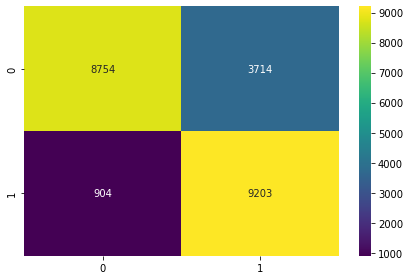

[0.7954374307862679, 0.8094353882738563, 0.8063372301361, 0.7953564773725967]

In [ ]:
# make prediction using trained model
preds = dt.predict(New_X_test)
# calculate accuracy and other evaluation measures
# make_predictions(y_test, preds)
modelEvaluation(y_test, preds, 'DeepTables')